In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

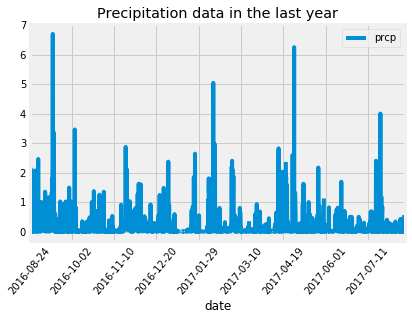

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
latest_Date = (session.query(Measurement.date).order_by(Measurement.date.desc())).first()

l_d_s = str(latest_Date[0]).split("-")
l_year = int(l_d_s[0])
l_month = int(l_d_s[1])
l_day =  int(l_d_s[2])

l_y_d_s = dt.date(l_year, l_month, l_day) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precipitation_Data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > l_y_d_s).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_Plot = pd.DataFrame(precipitation_Data).set_index("date").plot(title="Precipitation data in the last year")
plt.xticks(rotation=50)

![precipitation](Images/precipitation.png)

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = pd.DataFrame(precipitation_Data).describe()
summary

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?

#Option1
stations_Available = session.query(func.count(Station.station)).all()
stations_Available[0][0]
#Option2
# stations_Available= session.query(Station).count()
#Option3
# stations_Available = len(session.query(Station).all())


In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_Active_Stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [15]:
most_Active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# most_Active_list = []
# for i in most_Active_Stations:
#     most_Active_list.append(most_Active_Stations[0][0])
# most_Active_list[0]
most_Active_Station = most_Active_Stations[0][0]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#Option1
temperatures = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).order_by(Measurement.tobs).all()

#Option 2
# temperatures = session.query(Measurement.tobs).filter(Measurement.station == most_Active_Station).order_by(Measurement.tobs)
# temperature_Df = pd.DataFrame(temperatures)
# temperature_list = []
# for i in temperature_Df:
#     temperature_list.append(temperature_Df.min()[0])
#     temperature_list.append(temperature_Df.max()[0])
#     temperature_list.append(temperature_Df.mean()[0])
# temperature_list


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A45DA4FD30>]],
      dtype=object)

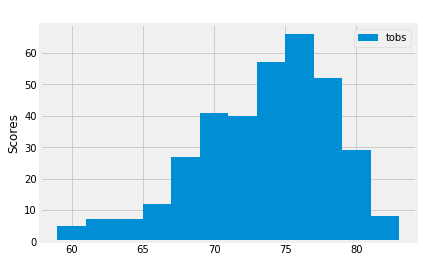

In [18]:
most_Active_Station_Temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_Active_Station, Measurement.date > l_y_d_s).order_by(Measurement.date)
most_Active_Station_Temps_Df = pd.DataFrame(most_Active_Station_Temps).set_index("date").sort_index(ascending=True).hist(bins=12, label="tobs")
# plt.hist(most_Active_Station_Temps_Df)
plt.title(" ")
plt.ylabel("Scores")
plt.legend(loc='upper right')
most_Active_Station_Temps_Df

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



![precipitation](Images/station-histogram.png)

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [29]:
my_Future_Trip = "2019-07-16 to 2019-07-21"
previous_Year_Trip = (calc_temps('2016-07-16', '2016-07-21'))
previous_Year_Trip

[(72.0, 77.56756756756756, 82.0)]

(-2, 2)

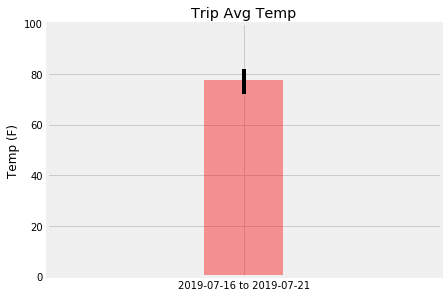

In [37]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
previous_Year_Trip_Min = previous_Year_Trip[0][0]
previous_Year_Trip_Avg = previous_Year_Trip[0][1]
previous_Year_Trip_Max = previous_Year_Trip[0][2]

minimum_Error = previous_Year_Trip_Avg - previous_Year_Trip_Min
maximum_Error = previous_Year_Trip_Max - previous_Year_Trip_Avg

error_Bar = np.array([[minimum_Error], [maximum_Error]])

plt.bar(my_Future_Trip, previous_Year_Trip_Avg, yerr=error_Bar, color = 'red', alpha = .4)
plt.tight_layout()
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.ylim(0, 100)
plt.xlim(-2, 2)

<IPython.core.display.Javascript object>


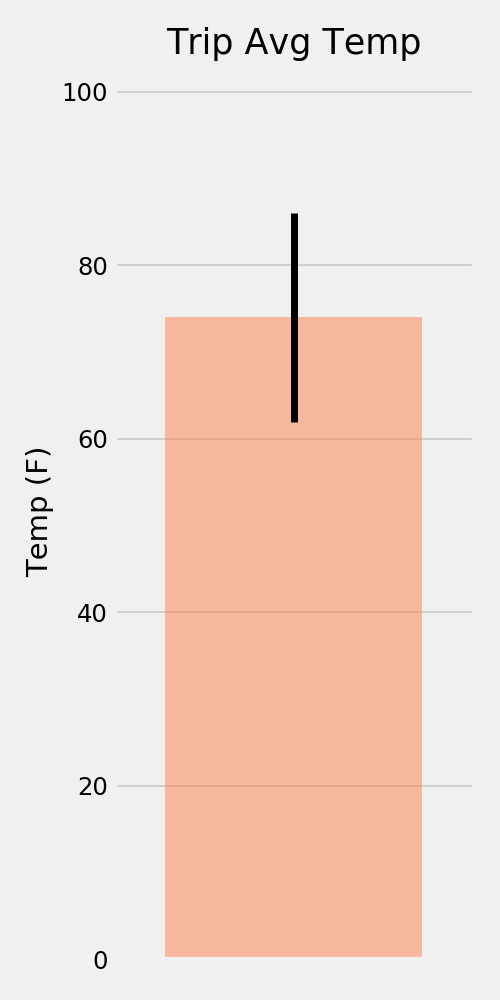

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
starting_Date = '2016-07-16'
ending_Date = '2016-07-21'

sel = ([Station.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation])
rainfal_Per_Weather_Station_Query = session.query(*sel).filter(Station.station == Measurement.station, Measurement.date >= starting_Date, Measurement.date <= ending_Date).group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
rainfal_Per_Weather_Station


,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",3.32,21.3331,-157.8025,152.4
1,USC00519281,"WAIHEE 837.5, HI US",2.06,21.45167,-157.84888999999998,32.9
2,USC00519397,"WAIKIKI 717.2, HI US",1.35,21.2716,-157.8168,3.0
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.08,21.5213,-157.8374,7.0
4,USC00513117,"KANEOHE 838.1, HI US",0.85,21.4234,-157.8015,14.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.77,21.33556,-157.71139,19.5
6,USC00517948,"PEARL CITY, HI US",0.5,21.3934,-157.9751,11.9


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


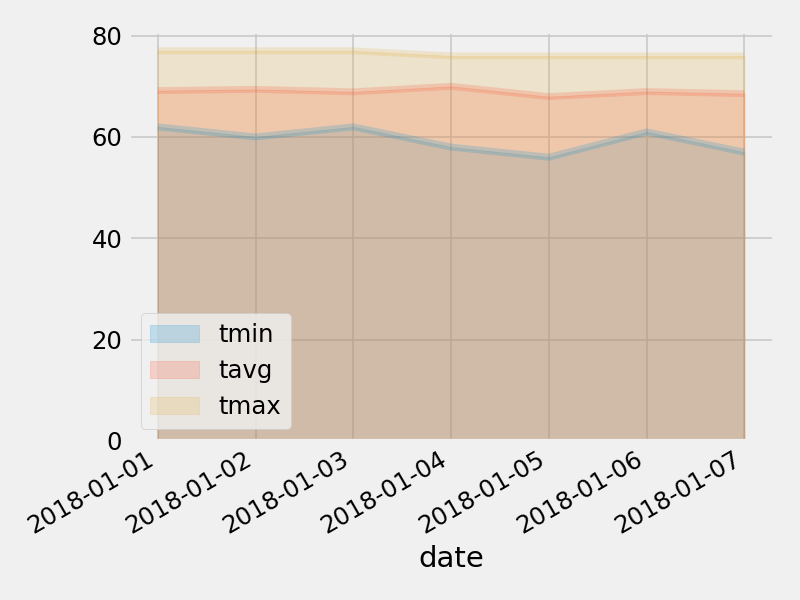

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
